SAI GANESH J R 
CB.EN.U4CSE20652
PART C AND D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
Kidney = pd.read_csv('/contentckd.csv')

In [3]:
Kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
Kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
Kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
Kidney.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
Kidney.shape

(400, 26)

In [8]:
kidney = Kidney[['hemo','bgr','classification']]

In [9]:
kcorr = kidney.corr()

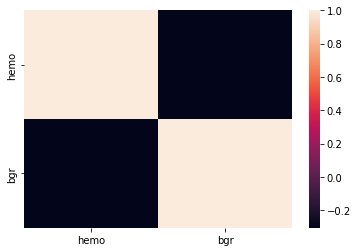

In [10]:
sns.heatmap(kcorr)

In [11]:
#only 2 classes must be there
kidney.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [12]:
kidney

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


Data cleaning

In [13]:
kidney.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [14]:
#fill the null values with the previous values
kidney.fillna(method='bfill',inplace=True)
kidney.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


hemo              0
bgr               0
classification    0
dtype: int64

In [15]:
kidney.shape

(400, 3)

In [ ]:
#cleaning is done.

In [16]:
kidney.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [17]:
classification = np.array(kidney['classification'])

In [18]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [19]:
kidney['classification']=classification

<ipython-input-19-ed159955a189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=classification


In [20]:
kidney.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [22]:
lab = LabelEncoder()
mms = MinMaxScaler()

In [23]:
kidney['classification']=lab.fit_transform(kidney['classification'])

<ipython-input-23-0431b877cc44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney['classification']=lab.fit_transform(kidney['classification'])


In [24]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [25]:
cols = kidney.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [26]:
for i in cols:
    kidney[i]=mms.fit_transform(kidney[[i]])

<ipython-input-26-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
<ipython-input-26-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kidney[i]=mms.fit_transform(kidney[[i]])
<ipython-input-26-a8dbd1328128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [27]:
kidney.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,0.631871,0.268344,0.375000
std,0.194916,0.169754,0.484729
min,0.000000,0.000000,0.000000
25%,0.496599,0.164530,0.000000
50%,0.639456,0.209402,0.000000
75%,0.795918,0.302350,1.000000
max,1.000000,1.000000,1.000000


In [28]:
# splitting the data for training and validation
from sklearn.model_selection import train_test_split

In [29]:
y = kidney.pop('classification')

In [30]:
X = kidney

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#now we have train and validation sets so we can deploy models

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
dtc = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC()

In [33]:

knn.fit(X=X_train,y=y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
dtc.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [35]:
svc.fit(X=X_train,y=y_train)

SVC()

In [36]:
knn_ypred = knn.predict(X_test)
dtc_ypred = dtc.predict(X_test)
svc_ypred = svc.predict(X_test)

In [37]:
#now checking the metrics like accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
#Knn
knn_acc = accuracy_score(y_test,knn_ypred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


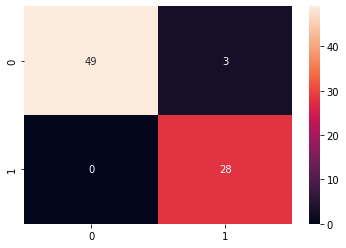

In [39]:
knn_conf = confusion_matrix(y_test,knn_ypred)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [40]:
print('The confusion matrix is :')
knn_conf

The confusion matrix is :


array([[49,  3],
       [ 0, 28]])

In [41]:
# dtc
dtc_acc = accuracy_score(y_test,dtc_ypred)
print(f'Accuracy score : {dtc_acc}')

Accuracy score : 0.95


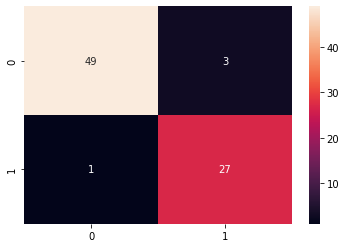

In [42]:
dtc_conf = confusion_matrix(y_test,dtc_ypred)
sns.heatmap(dtc_conf,cbar=True,annot=True)

In [43]:
print('The confusion matrix is :')
dtc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

In [44]:
#svc
svc_acc = accuracy_score(y_test,svc_ypred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


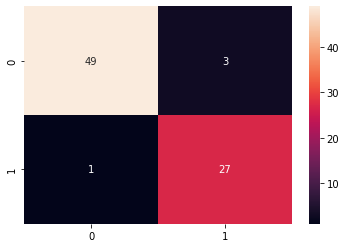

In [45]:
svc_conf = confusion_matrix(y_test,svc_ypred)
sns.heatmap(svc_conf,cbar=True,annot=True)

In [46]:
print('The confusion matrix is :')
svc_conf

The confusion matrix is :


array([[49,  3],
       [ 1, 27]])

Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD
Given that Alice has heamoglobin 0 std's above average and 1.1 std's above average so heamoglobin is (0std)+(mean(heamoglobin) and glucose is (1.1std)+mean(glucose)

In [47]:
hem = np.array(kidney['hemo'])
glu = np.array(kidney['bgr'])

In [48]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [49]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


In [ ]:
#prediction whether alice has the disease or not

In [50]:
#knn
ali_knn = knn.predict(alice)
ali_dtc = dtc.predict(alice)
ali_svc = svc.predict(alice)

In [51]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in KNN : {ali_dtc}')
print(f'Prediction of disease in KNN : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]
Prediction of disease in KNN : [0.]


above predictions show that Alice does'nt have disease beacuse all the predictions are 0.

So alice DOES NOT HAVE DISEASE